## 1. Import Library

In [8]:
import pandas as pd
import numpy as np
import anndata
import scanpy as sc
import locCSN
import matplotlib.pyplot as plt
# print(python.__version__)

## 2. Load data 

In [3]:
adata_Fib = sc.read('PDAC_Fibroblast.h5ad') 

In [4]:
adata_Fib

AnnData object with n_obs × n_vars = 6713 × 23375
    obs: 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'total_expression'
    uns: 'cluster_colors', 'rank_genes_groups'

In [12]:
Fibroblast_general = ["FAP", "LUM", "DCN", "PDPN", "COL1A1", "MFAP4"]  
iCAFs = ["IL6", "IL11", "LIF", "CXCL1", "CXCL8", "SOD2", "HAS1", "MT2A"]
myCAFs = ["ACTA2", "TAGLN", "TPM2", "MYLK", "MYL9", "MYH11", "ACTG2", "POSTN", "SDC1", "MMP11", "CTHRC1"]

In [13]:
all_genes = Fibroblast_general + iCAFs + myCAFs
all_genes.remove('CXCL8')
all_genes.remove("IL6")
all_genes.remove("IL11")
all_genes.remove("LIF")
all_genes.remove("MYH11")
all_genes.remove("CXCL1")
len(all_genes)

19

In [7]:
adata_Fib_maker_genes = adata_Fib[:, all_genes]
adata_Fib_maker_genes

View of AnnData object with n_obs × n_vars = 6713 × 19
    obs: 'cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'total_expression'
    uns: 'cluster_colors', 'rank_genes_groups'

In [8]:
adata_Fib_maker_genes.var.head()

,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,total_expression
Unnamed: 0,,,,,,,,,
FAP,False,7260,0.258613,0.230010,87.380497,14878.0,9.607706,7260,14365.0
LUM,False,23015,9.215974,2.323953,59.994785,530195.0,13.181002,23015,517771.0
DCN,False,22334,6.154024,1.967675,61.178516,354041.0,12.777171,22334,347176.0
PDPN,False,4330,0.151938,0.141446,92.473492,8741.0,9.075894,4330,8399.0
COL1A1,False,23100,10.224404,2.418090,59.847036,588210.0,13.284841,23100,570798.0


In [9]:
adata_Fib_maker_genes.X.shape

(6713, 19)

In [10]:
print("Remaining cells %d"%adata_Fib_maker_genes.n_obs,",", "Remaining genes %d"%adata_Fib_maker_genes.n_vars)

Remaining cells 6713 , Remaining genes 19


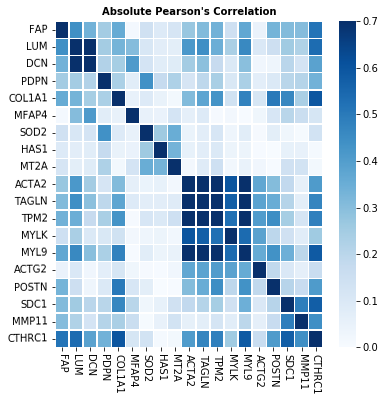

In [14]:
import seaborn as sns
X_Fib = adata_Fib_maker_genes.X.transpose()

corr_Fib = np.corrcoef(X_Fib)

# np.fill_diagonal(corr_Fib, 0)

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(abs(corr_Fib), vmin=0, vmax=0.7,linewidth = 0.5, cmap='Blues')
ax.set_yticklabels(all_genes,rotation=1) 
ax.set_xticklabels(all_genes,rotation=270) 
plt.title("Absolute Pearson's Correlation", fontsize = 10, fontweight = "bold")
plt.savefig('Pearson.png')

In [5]:
import pickle as pkl
import scipy

In [4]:
!pip install scipy

     |████████████████████████████████| 35.0 MB 357 kB/s eta 0:00:01


In [6]:
with open("csn_Fib", "rb") as fp:
    b = pkl.load(fp)

In [11]:
adata_Fib_maker_genes.X.transpose()

ArrayView([[  3.,   1.,   0., ...,   0.,   0.,   0.],
           [176.,  74.,  14., ...,  15.,   2.,  12.],
           [ 54.,  11.,  16., ...,  16.,   3.,  36.],
           ...,
           [  0.,   2.,   0., ...,   0.,   0.,   0.],
           [  0.,   5.,   0., ...,   0.,   0.,   0.],
           [  6.,  12.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [12]:
corr_Fib = np.corrcoef(X_Fib)
corr_Fib.shape

(19, 19)

In [13]:
# import re
# # 'EpCAM' in adata.var.index
# r = re.compile(".*EPCAM")
# newlist = list(filter(r.match, adata.var.index)) # Read Note below
# print(newlist)

In [ ]:
import time
start = time.time()
csn_Fib = locCSN.csn(X_Fib, dev = True)
end = time.time()
print(end - start) 

171 pairs need calculation


In [ ]:
type(csn_Fib) 

In [ ]:
# list
len(csn_Fib) # 138 cells

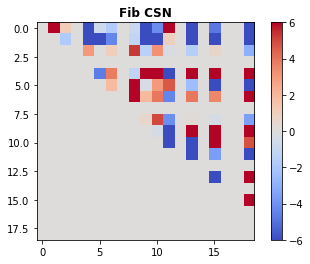

In [9]:
# Let's see the test statistics for the first cell in DEC
plt.imshow(b[0].toarray(), vmin = -6, vmax = 6, cmap = 'coolwarm')
plt.title('Fib CSN', fontweight = "bold")
plt.colorbar()

In [ ]:
sc.pl.heatmap(adata_Fib_maker_genes, adata_Fib_maker_genes.var.index, groupby= "cluster", dendrogram = False, swap_axes = True 
            , cmap='gist_heat', figsize=(12,12))

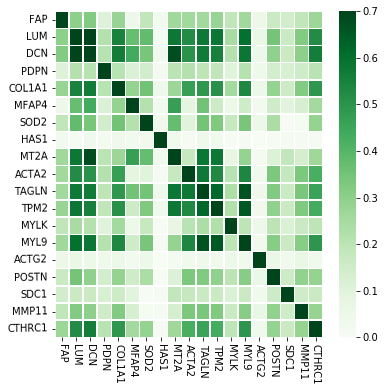

In [14]:
from scipy.stats import norm
import seaborn as sns

# Cutoff at norm(0.95)
csn_mat = [(item > norm.ppf(0.95)).astype(int) for item in b]
avgcsn_Fib = sum(csn_mat).toarray()/len(csn_mat) + np.transpose(sum(csn_mat).toarray()/len(csn_mat))
np.fill_diagonal(avgcsn_Fib, 1)

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(avgcsn_Fib, vmin=0, vmax=0.7,linewidth = 0.5, cmap='Greens')
ax.set_yticklabels(all_genes,rotation=1) 
ax.set_xticklabels(all_genes,rotation=270) 
plt.savefig('Pearson.png')